# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your section lead.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [84]:
import matplotlib.pyplot as plt, pandas as pd, seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

sns.set_style('darkgrid')

---

## Load data

In [2]:
df = pd.read_csv('data/mypersonality.csv')
# df = pd.read_csv('data/mypersonality_noprofanity.csv') 
# comment out above & uncomment this to use mypersonality_noprofanity.csv
df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY',
                 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'], inplace=True)
df.head(2).T

,0,1
#AUTHID,b7b7764cfa1c523e4e93ab2a79a946c4,b7b7764cfa1c523e4e93ab2a79a946c4
STATUS,likes the sound of thunder.,is so sleepy it's not even funny that's she can't get to sleep.
sEXT,2.65,2.65
sNEU,3,3
sAGR,3.15,3.15
sCON,3.25,3.25
sOPN,4.4,4.4
cEXT,n,n
cNEU,y,y
cAGR,n,n


In [3]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE'],
      dtype='object')

---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

#### Create a new column called `status_length` that contains the length of each status:

In [4]:
df['status_length'] = df['STATUS'].map(lambda x: len(x))

df.head(2).T

,0,1
#AUTHID,b7b7764cfa1c523e4e93ab2a79a946c4,b7b7764cfa1c523e4e93ab2a79a946c4
STATUS,likes the sound of thunder.,is so sleepy it's not even funny that's she can't get to sleep.
sEXT,2.65,2.65
sNEU,3,3
sAGR,3.15,3.15
sCON,3.25,3.25
sOPN,4.4,4.4
cEXT,n,n
cNEU,y,y
cAGR,n,n


In [5]:
#### Create a new column called `status_word_count` that contains the number of
#words in each status. Note: You can evaluate this based off of how many strings 
# are separated by whitespaces; you're not required to check that each set of 
#characters set apart by whitespaces is a word in the dictionary.

df['status_word_count'] = df['STATUS'].map(lambda x: len(x.split()))
df.head(2).T

,0,1
#AUTHID,b7b7764cfa1c523e4e93ab2a79a946c4,b7b7764cfa1c523e4e93ab2a79a946c4
STATUS,likes the sound of thunder.,is so sleepy it's not even funny that's she can't get to sleep.
sEXT,2.65,2.65
sNEU,3,3
sAGR,3.15,3.15
sCON,3.25,3.25
sOPN,4.4,4.4
cEXT,n,n
cNEU,y,y
cAGR,n,n


### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

#### Show the five longest and five shortest statuses based off of `status_word_count`:

In [6]:
#shortest
df['status_word_count'].sort_values(ascending=True).head()

8178    1
4170    1
2016    1
956     1
4177    1
Name: status_word_count, dtype: int64

In [7]:
#longest
df['status_word_count'].sort_values(ascending=False).head()

496     89
6989    85
5208    84
5680    83
9695    83
Name: status_word_count, dtype: int64

## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

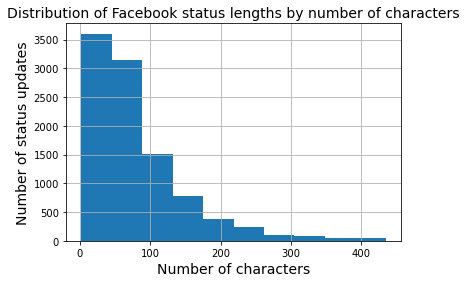

In [53]:
df['status_length'].hist();
plt.title('Distribution of Facebook status lengths by number of characters', size=14);
plt.xlabel('Number of characters', size=14)
plt.ylabel('Number of status updates', size=14);

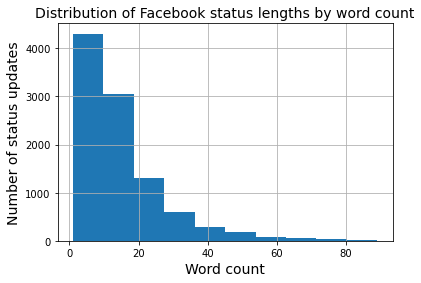

In [52]:
df['status_word_count'].hist();
plt.title('Distribution of Facebook status lengths by word count', size = 14);
plt.xlabel('Word count', size = 14)
plt.ylabel('Number of status updates', size = 14);

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

In [91]:
#filter out only score columns

types = pd.DataFrame(df.dtypes, columns=['datatype']) #make a df from our column 
#datatypes, and name the resulting column (which is otherwise unnamed)

only_scores = types[(types.datatype == "float64")].index #filter for only the floats;
#we know this because we saw that these are the only datatypes in the df that corr.
#to scores

only_scores

Index(['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN'], dtype='object')

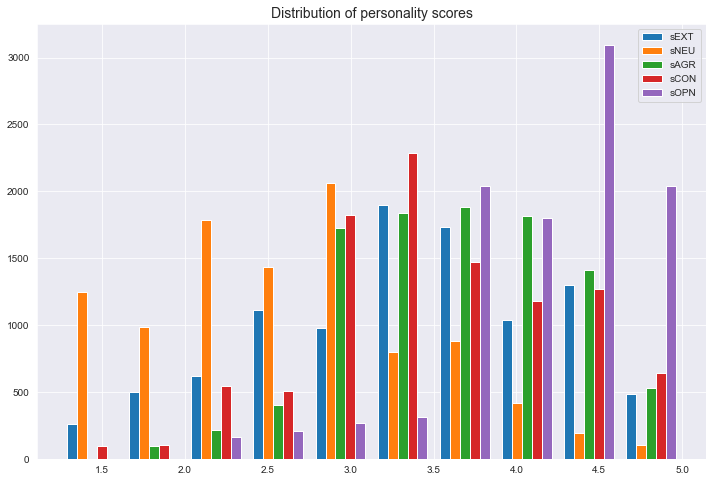

In [99]:
#plt.hist([data_1, data_2])
#code ref from: https://www.kite.com/python/answers/how-to-plot-two-histograms-on-one-plot-using-matplotlib-in-python

plt.figure(figsize=(12,8))
plt.hist([df['sEXT'], df['sNEU'], df['sAGR'], df['sCON'], df['sOPN']]);
plt.title('Distribution of personality scores', size=14);
plt.legend(('sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN'), loc='upper right');

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [14]:
#let's use some SQL, baby
#docstring: https://pypi.org/project/pandasql/
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

def pysqldf(q):
    #add this to your script if you get tired of calling locals()
    return sqldf(q, globals())

In [24]:
df = df.rename(columns={'#AUTHID':'author'})
df.columns

Index(['author', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

In [40]:
df = df


q = """
    SELECT DISTINCT author, COUNT(status) AS num_posts
           FROM df
           GROUP BY author
           ORDER BY num_posts DESC
              
"""
print(pysqldf(q).head(15))

                              author  num_posts
0   e6cdef6f475cce3023c5b715f8c9f110        223
1   6f2bebc01062eb8334dccba3e048fdb5        219
2   527ed53d2ba3a3bc417b8402d5b2f556        194
3   d7e500ad854a1b6ced39e53a525b8a6d        184
4   0737e4e4980f56c9fb1cb5743001c917        172
5   502db2fcfe26705ae16a46c5cb2ad2e5        165
6   b4a21c82de4011033c8ac67081ff939c        162
7   b2be41464b53ffc6deae9536ddfd3aee        159
8   c3f4b3e345cb6b032db2e0459d179db3        153
9   715c9eb832dc833a0b6409ddccd268b1        151
10  f7456ac4e6b20911c40fdad18908a8d2        150
11  0bfa3d952ffed50f25011b128e73a820        141
12  e4a512374eee079d2b8acc2ce69990d5        126
13  dbdfbfda2a4205bd59b22758ceddd5af        126
14  f2026b8cb48aff9af31577ecbfda5c38        123


In [56]:
df = df


q = """
    SELECT COUNT(DISTINCT(author)) as unique_authors, COUNT(status) as posts
           FROM df
              
"""
print(pysqldf(q))

   unique_authors  posts
0             250   9916


In [48]:
df = df


q = """
    SELECT COUNT(status)/COUNT(DISTINCT(author)) as posts_per_author
           FROM df
              
"""
print(pysqldf(q))

   posts_per_author
0                39


## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

#### Plot the distribution of personality scores for `unique_users`:

Do the distributions look different? Here, each individual user will only be represented once.

#### Use the `.describe()` method on `unique_users`:

### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

---

## Exploring status length and word count based on personality

#### Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.

You'll need to use `groupby()` five separate times for this.

#### Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts of posts by users who score high (`y`) and the distribution of status word counts of posts by users who score low (`n`) in that personality category:

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

### Show the 15 most common words

### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

#### Provide a short explanation of what you believe `propname` to be:

Hint: The attached PDF also contains an explanation.

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

#### Show the 25 most common words for statuses from high-cAGR users:

#### Show the 25 most common words for statuses from low-cAGR users:

### (BONUS) Most common bigrams:

This is a bonus section and not required.

Find the 10 most common bigrams in the dataset.

### (BONUS) Most common trigrams:

This is a bonus section and not required.

Find the 10 most common trigrams in the dataset.

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as _explanatory_. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.